## Observations and Insights 

1. Capomulin and Ramicane seem to be good drugs in order to reduce the volume of the tumor, as evidenced by the Box Plots obtained.
2. There is a positive and clear correlation between the weight of the mouse and the volume of the tumor. Having a positive correlation does not mean that having more weight causes larger tumors or that larger tumors cause cause more weight in mice.
3. The r-squred obtained in the linear reggression is 92% which is very good as it means that the model explains 92% of the variables behaviour, in this case the weight and the volume of the tumor. This may be reasonable as having heavier mice leads to think that the body of the mice is bigger, therefore allowing a bigger tumor in the mice's bodies before dead.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")

In [2]:
# Checking the number of mice in the DataFrame.
combined_data.shape


(1893, 8)

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data[["Mouse ID","Timepoint"]]

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf=combined_data.drop_duplicates(subset=['Mouse ID'], keep='last')
cleandf


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [5]:
# Checking the number of mice in the clean DataFrame.
cleandf.shape

(249, 8)

## Summary Statistics

In [6]:
# create series for each of mean, median, variance, std deviation and SEM of the tumor volume for each regimen

mean = cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summarystatistics_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarystatistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar Plots

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
drugregimen_df = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count())
drugregimen_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [9]:
# getting the columns to be used in the graph
plotgraphcolumns = drugregimen_df[["Mouse ID"]]
plotgraphcolumns = plotgraphcolumns.rename(columns={"Mouse ID": "Number of mice"})
plotgraphcolumns


,Number of mice
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


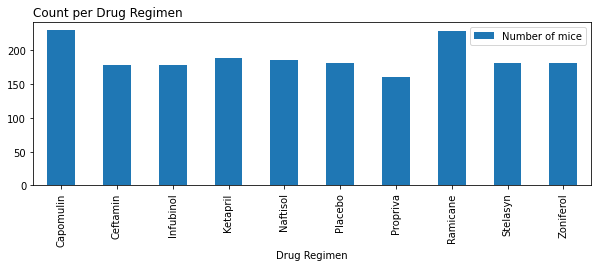

In [10]:

# Use DataFrame.plot() in order to create a bar chart of the data
plotgraphcolumns.plot(kind="bar",figsize=(10,3))
plt.title("Count per Drug Regimen",loc='left')
plt.show()


In [11]:
drugregimen_df = drugregimen_df.reset_index()

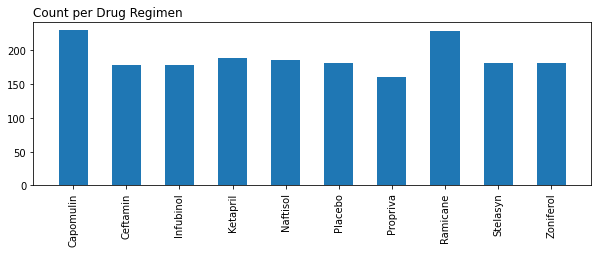

In [12]:
# Generate the lists for the axis.

x_axis = np.arange(len(drugregimen_df))
regimenlist = drugregimen_df["Drug Regimen"].tolist()
regimen_count = (combined_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.figure(figsize=(10,3))
plt.bar(x_axis,regimen_count,width=0.55)
plt.xticks(x_axis, regimenlist,rotation="vertical")
plt.title("Count per Drug Regimen",loc='left')
plt.show()

## Pie Plots

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Getting the series to plot
sexdf = cleandf.groupby(["Sex"]).count()
sexseries = sexdf["Mouse ID"]

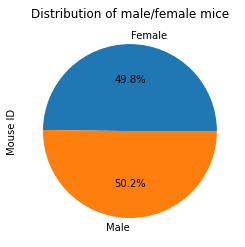

In [14]:
# Plotting the series obtained
sexseries.plot(kind="pie",autopct="%1.1f%%")
plt.title("Distribution of male/female mice")
plt.show()

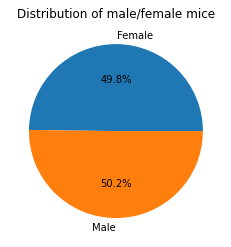

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#setting labels
labels= ["Female","Male"]
plt.pie(sexseries, labels=labels, autopct="%1.1f%%", startangle=0)
plt.title("Distribution of male/female mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# using the cleandf in order to avoid duplicated data I got a new dataframe in which I only get those mice that received the mentioned drugs
capodf=cleandf[cleandf["Drug Regimen"].isin(["Capomulin"])].reset_index()
caposeries=capodf["Tumor Volume (mm3)"].tolist()
ramidf=cleandf[cleandf["Drug Regimen"].isin(["Ramicane"])].reset_index()
ramiseries=ramidf["Tumor Volume (mm3)"].tolist()
infudf=cleandf[cleandf["Drug Regimen"].isin(["Infubinol"])].reset_index()
infuseries=infudf["Tumor Volume (mm3)"].tolist()
ceftadf=cleandf[cleandf["Drug Regimen"].isin(["Ceftamin"])].reset_index()
ceftaseries=ceftadf["Tumor Volume (mm3)"].tolist()


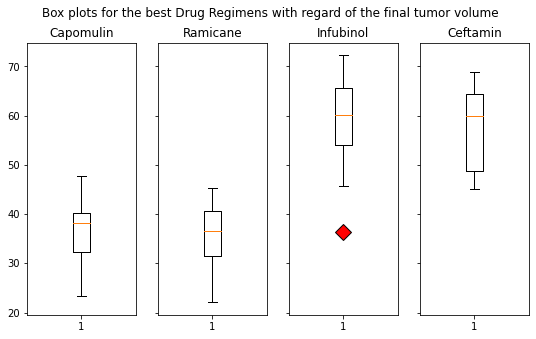

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest. Highlighting the
# potential outliers in the plot by changing their color and style to red and diamond shape
fig, axs = plt.subplots(1,4,sharey=True,figsize=(9,5))
fig.suptitle('Box plots for the best Drug Regimens with regard of the final tumor volume')
axs[0].boxplot(caposeries)
axs[0].set_title("Capomulin")
axs[1].boxplot(ramiseries)
axs[1].set_title("Ramicane")
axs[2].boxplot(infuseries,flierprops=dict(marker='D', markerfacecolor='red', markersize=12,linestyle='none'))
axs[2].set_title("Infubinol")
axs[3].boxplot(ceftaseries)
axs[3].set_title("Ceftamin")
plt.show()

## Line and Scatter Plots

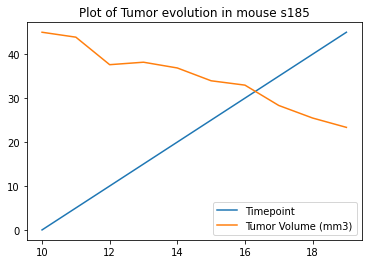

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Creating a dataframe that shows, for a single mouse the Timepoint and the Tumor Volume
timetumor = combined_data[combined_data["Mouse ID"].isin(["s185"])]
timetumor = timetumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
timetumor.plot()
plt.title("Plot of Tumor evolution in mouse s185")
plt.show()



In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Creating the dataframe to plot
capoplot = combined_data[combined_data["Drug Regimen"].isin(["Capomulin"])]
capoplotdf = combined_data[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]].sort_values(["Weight (g)"], ascending=True).reset_index()
capoplot = capoplotdf.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
capoplotdf = pd.DataFrame(capoplot).reset_index()
capoplotdf


,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,16,36.766850
2,17,38.039595
3,18,37.882878
4,19,40.490692
5,20,40.282715
6,21,41.600328
7,22,42.426122
8,23,47.271856
9,24,44.628647


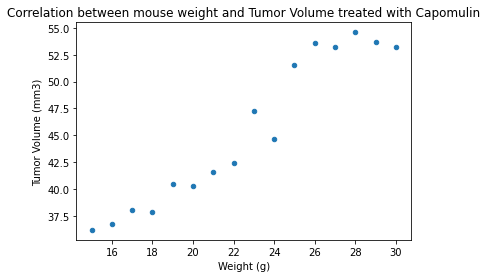

In [20]:
capoplotdf.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
plt.title("Correlation between mouse weight and Tumor Volume treated with Capomulin")
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [22]:
from sklearn import datasets
from scipy.stats import linregress
x_values = capoplotdf['Weight (g)']
y_values = capoplotdf['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


The r-squared is: 0.9265586796981545


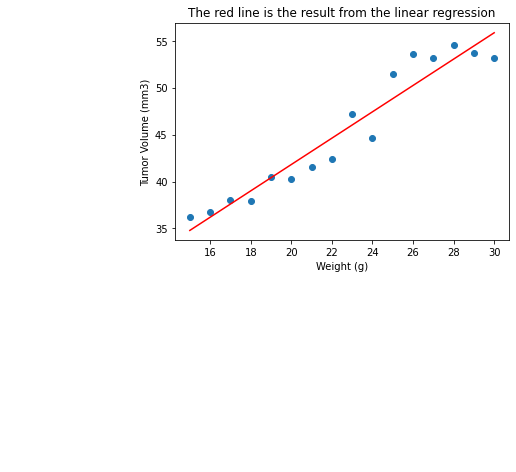

In [23]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.title("The red line is the result from the linear regression")
plt.show()